Goibibo dataset 


EDA for the given dataset has been performed below 

In [28]:
import numpy as np                 
import pandas as pd               
import matplotlib                 
import matplotlib.pyplot as plt
import seaborn as sns           
plt.style.use('fivethirtyeight')
%matplotlib inline
import plotly as plotly                
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import folium
from folium import plugins
from folium.plugins import HeatMap
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor

In [6]:
df = pd.read_csv('goibibo_com-travel_sample.csv')

In [7]:
df.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,17,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,https://www.goibibo.com/hotels/woodchime-homes...,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,18,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,https://www.goibibo.com/hotels/stepinn-iffco-c...,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,15,Room Service |Air Conditioning |Cable / Satell...,Standard Room,https://www.goibibo.com/hotels/sunrise-beach-r...,2.0,2.5,Service Quality::2.5|Amenities::2.5|Food and D...,goibibo,Goa,9b59d00eaffc273d83000ed7dcda0e83
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,24,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,https://www.goibibo.com/hotels/green-cottages-...,1.0,5.0,Service Quality::5.0|Amenities::5.0|Food and D...,goibibo,Himachal Pradesh,df0971f9c5501af112485ee28b468ce5
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,20,Basic Bathroom Amenities|Cable / Satellite / P...,Standard Room Non AC,https://www.goibibo.com/hotels/delhi-continent...,121.0,2.8,Service Quality::2.7|Amenities::2.6|Food and D...,goibibo,Delhi,0c3514344c9cda8718f558e84bdb44ef


In [8]:
df.columns.values

array(['additional_info', 'address', 'area', 'city', 'country',
       'crawl_date', 'guest_recommendation', 'hotel_brand',
       'hotel_category', 'hotel_description', 'hotel_facilities',
       'hotel_star_rating', 'image_count', 'latitude', 'locality',
       'longitude', 'pageurl', 'point_of_interest', 'property_id',
       'property_name', 'property_type', 'province', 'qts',
       'query_time_stamp', 'review_count_by_category', 'room_area',
       'room_count', 'room_facilities', 'room_type', 'similar_hotel',
       'site_review_count', 'site_review_rating',
       'site_stay_review_rating', 'sitename', 'state', 'uniq_id'],
      dtype=object)

In [49]:
df.isna().any()

additional_info              True
address                     False
area                         True
city                        False
country                     False
crawl_date                  False
guest_recommendation         True
hotel_brand                  True
hotel_category              False
hotel_description            True
hotel_facilities             True
hotel_star_rating           False
image_count                 False
latitude                    False
locality                     True
longitude                   False
pageurl                     False
point_of_interest            True
property_id                 False
property_name               False
property_type               False
province                    False
qts                          True
query_time_stamp            False
review_count_by_category     True
room_area                    True
room_count                  False
room_facilities              True
room_type                   False
similar_hotel 

In [51]:
empty_col_list = ['room_facilities', 'site_review_count', 'site_review_rating']
for i in empty_col_list: 
    print('Percentage of null rows in column', i ,':', sum(pd.isnull(df[i]))/df.shape[0] * 100)

Percentage of null rows in column room_facilities : 6.75
Percentage of null rows in column site_review_count : 39.6
Percentage of null rows in column site_review_rating : 39.6


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
guest_recommendation,2416.0,75.537666,22.698935,0.000000,67.000000,80.000000,90.000000,100.000000
hotel_star_rating,4000.0,1.306000,1.479159,0.000000,0.000000,1.000000,3.000000,5.000000
image_count,4000.0,12.995500,11.631113,0.000000,6.000000,9.000000,17.000000,129.000000
latitude,4000.0,21.288213,7.576905,8.080476,13.748553,22.225083,28.018203,79.608077
longitude,4000.0,77.432995,4.506588,12.939682,74.723694,76.967365,78.286097,95.346775
room_count,4000.0,22.200250,96.132138,0.000000,7.000000,14.000000,26.000000,5874.000000
site_review_count,2416.0,47.765728,93.233924,0.000000,4.000000,17.000000,55.000000,2094.000000
site_review_rating,2416.0,3.750993,0.842863,0.000000,3.400000,3.900000,4.300000,5.000000


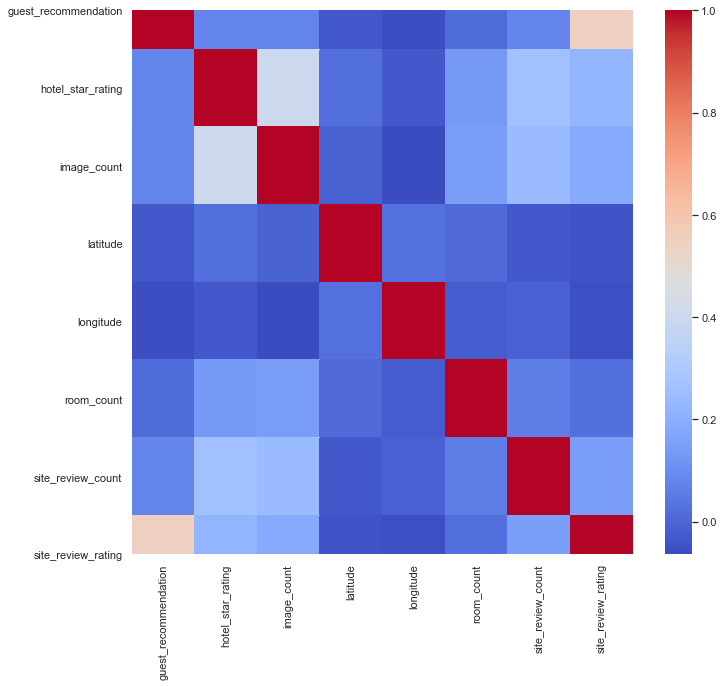

In [54]:
sns.heatmap(df.corr(), cmap='coolwarm')
sns.set(rc={'figure.figsize':(10,10)}, font_scale=1)

In [55]:
df.corr().style.background_gradient(cmap='coolwarm')

,guest_recommendation,hotel_star_rating,image_count,latitude,longitude,room_count,site_review_count,site_review_rating
guest_recommendation,1,0.0786641,0.075867,-0.0381069,-0.0571215,0.0130453,0.0814082,0.549253
hotel_star_rating,0.0786641,1,0.399877,0.0234373,-0.031867,0.133108,0.262808,0.222165
image_count,0.075867,0.399877,1,-0.00879827,-0.0633484,0.145609,0.240303,0.184787
latitude,-0.0381069,0.0234373,-0.00879827,1,0.0252906,0.0104342,-0.0305002,-0.0426549
longitude,-0.0571215,-0.031867,-0.0633484,0.0252906,1,-0.0236621,-0.010539,-0.0541793
room_count,0.0130453,0.133108,0.145609,0.0104342,-0.0236621,1,0.0575882,0.0237852
site_review_count,0.0814082,0.262808,0.240303,-0.0305002,-0.010539,0.0575882,1,0.152578
site_review_rating,0.549253,0.222165,0.184787,-0.0426549,-0.0541793,0.0237852,0.152578,1


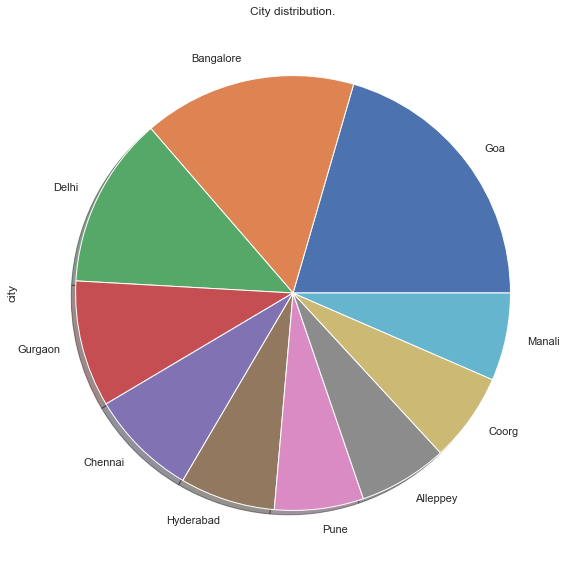

In [86]:
df.city.value_counts().nlargest(10).plot.pie(shadow=True)
plt.title('City distribution.')
plt.show()

In [47]:
nycmap=folium.Map([21.15, 79.09],zoom_start=4)
HeatMap(df[['latitude','longitude']].dropna(),radius=7,gradient={0.125:'blue',0.250:'purple',0.5:'yellow',0.75:'orange',1.0:'red'}).add_to(nycmap)
display(nycmap)

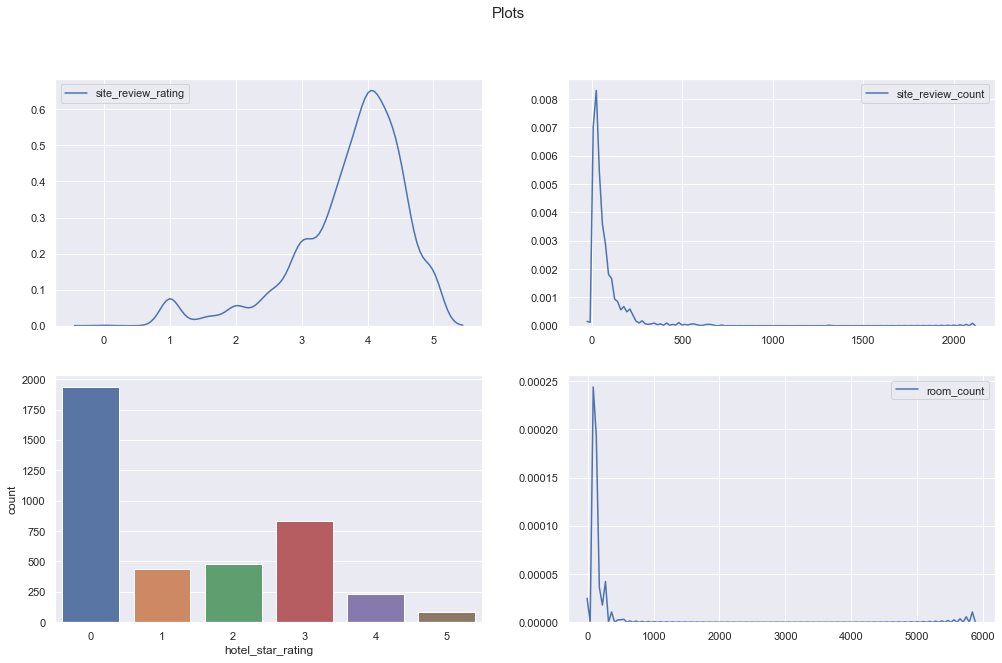

In [106]:
f, axarr = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle('Plots', fontsize=15)
sns.kdeplot(df['site_review_rating'], ax=axarr[0][0])
sns.kdeplot(df['site_review_count'], ax=axarr[0][1])
sns.countplot(df['hotel_star_rating'], ax=axarr[1][0])
sns.kdeplot(df['room_count'], ax=axarr[1][1])
plt.show()

Text(0.5, 0.98, 'JointPlot')

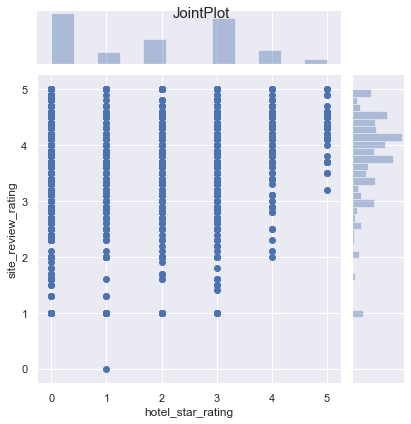

In [115]:
sns.jointplot(df['hotel_star_rating'], df['site_review_rating'])
plt.suptitle('JointPlot', fontsize=15)